In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("adult.csv")
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
df.describe

<bound method NDFrame.describe of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-marri

In [6]:
df = df.replace('?', np.NaN)
df.head

<bound method NDFrame.head of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90       NaN   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66       NaN  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married  

In [7]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
df["workclass"].mode()[0]

'Private'

In [9]:
df["occupation"].mode()[0]

'Prof-specialty'

In [10]:
df["native.country"].mode()[0]

'United-States'

In [11]:
df["workclass"].fillna(df["workclass"].mode()[0], inplace=True)
df["occupation"].fillna(df["occupation"].mode()[0], inplace=True)
df["native.country"].fillna(df["native.country"].mode()[0], inplace=True)

df["workclass"].describe()

count       32561
unique          8
top       Private
freq        24532
Name: workclass, dtype: object

In [12]:
df.describe

<bound method NDFrame.describe of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90   Private   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66   Private  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-marri

In [13]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

<AxesSubplot:>

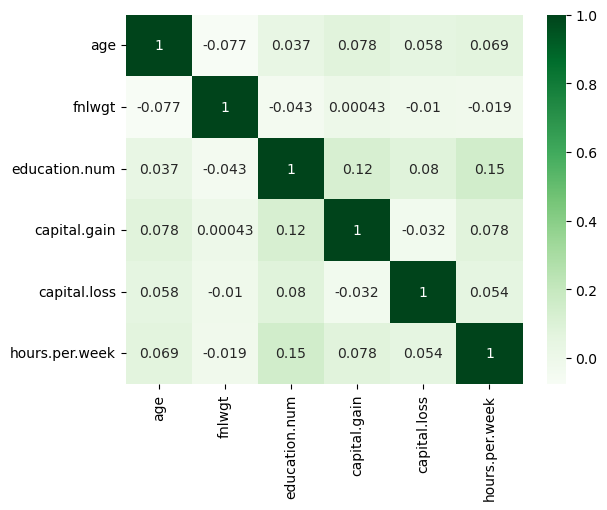

In [14]:
sns.heatmap(df.corr(),cmap = 'Greens',annot = True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education.num'}>,
        <AxesSubplot:title={'center':'capital.gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours.per.week'}>]], dtype=object)

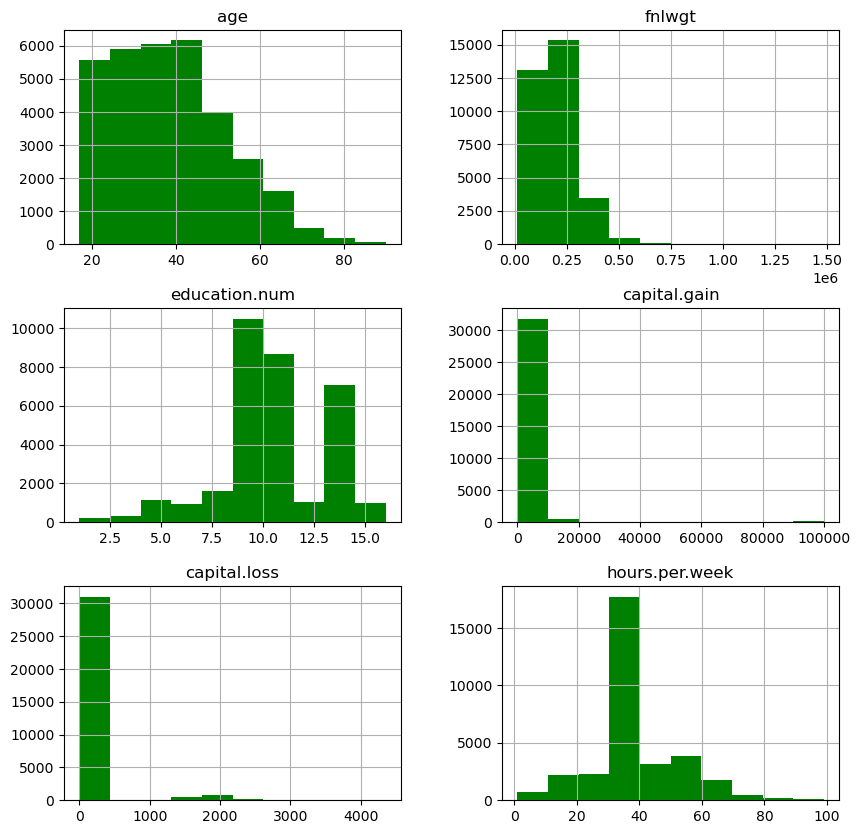

In [15]:
df.hist(figsize = (10,10), color = "Green")

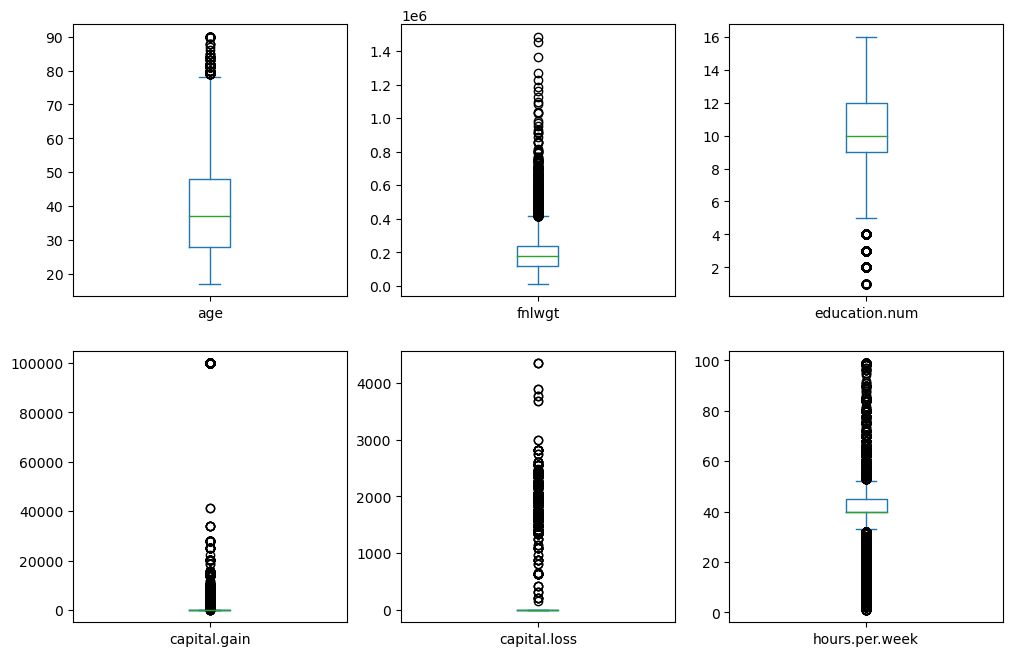

In [16]:
df.plot(kind = 'box', figsize = (12,12), layout = (3,3), sharex = False, subplots = True);

In [18]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

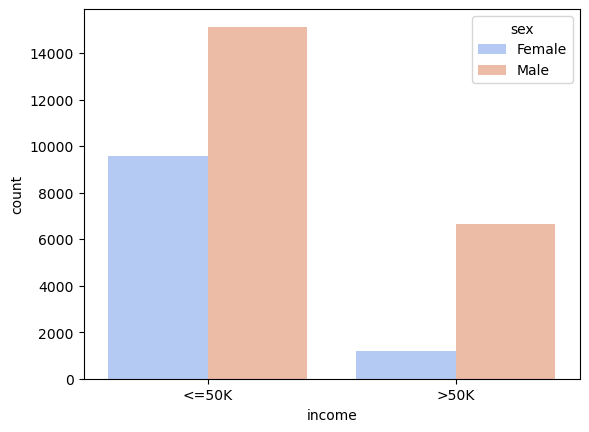

In [19]:
sns.countplot(df['income'], palette='coolwarm', hue='sex', data=df);

In [20]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder

num_col = ['age', 'fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
df.num = df[num_col]
df.num

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


# PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(df.num)

array([[-1.12725567e+05, -1.08159367e+03,  4.26250405e+03],
       [-5.69085666e+04, -1.08329643e+03,  4.26463275e+03],
       [-3.71756658e+03, -1.08491460e+03,  4.26671954e+03],
       ...,
       [-3.54043958e+04, -1.07641859e+03, -9.05501713e+01],
       [-3.78683960e+04, -1.07634102e+03, -9.06102320e+01],
       [ 1.17116044e+04, -1.07785772e+03, -8.87784724e+01]])

In [22]:
print(pca.components_)
print(sum(pca.explained_variance_ratio_))

[[-9.90507714e-06  9.99999999e-01 -1.05283840e-06  3.03678811e-05
  -3.91389877e-05 -2.19555372e-06]
 [ 1.43514070e-04 -3.04337871e-05  4.27228452e-05  9.99998483e-01
  -1.72989546e-03  1.31095844e-04]
 [ 2.01710563e-03  3.91106215e-05  5.32933664e-04  1.72935042e-03
   9.99994820e-01  1.73646184e-03]]
0.999999969574739


In [23]:
pca.explained_variance_ratio_

array([9.95113642e-01, 4.87183949e-03, 1.44878108e-05])

In [24]:
X= df.drop(['income'], axis=1)
y = df['income']

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [26]:
df2= df.copy()
df2= df2.apply(LabelEncoder().fit_transform)
df2.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,3,2649,11,8,6,9,1,4,0,0,91,39,38,0
1,65,3,6514,11,8,6,3,1,4,0,0,91,17,38,0
2,49,3,11175,15,9,6,9,4,2,0,0,91,39,38,0
3,37,3,7009,5,3,0,6,4,4,0,0,90,39,38,0
4,24,3,16850,15,9,5,9,3,4,0,0,90,39,38,0


In [27]:
ss= StandardScaler().fit(df2.drop('income', axis=1))

In [28]:
X= ss.transform(df2.drop('income', axis=1))
y= df['income']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Accuracy on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Accuracy on training data: 0.824
Accuracy on test data: 0.823


# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Accuracy on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Accuracy on training data: 1.000
Accuracy on test data: 0.854
